## Problem Statement

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Nitin/Downloads/aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


Given data has record for 180 customers

In [3]:
df.shape

(180, 9)

There are no null values as all columns shows 180 non-null values

Also, isnull() function also gives us 0 value for each column as there are no null values


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


Below is the statistical summary of the given data :

1. Most purchased order is KP281.
2. Customers purchasing treadmills are between age 18 and 50.
3. Major Customers are Male.
4. Major customers were Partnered.
5. Usage 2 to 7 times per week


In [6]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Checking the data type for each column

In [7]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

## Non-Graphical Analysis

Most purchased product is KP281

In [8]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [9]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [10]:

for col in df.columns:
    
    if df[col].nunique()<10:
        print('Category : ', col)
        print(df[col].value_counts())
        print('--'*15)


Category :  Product
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
------------------------------
Category :  Gender
Male      104
Female     76
Name: Gender, dtype: int64
------------------------------
Category :  Education
16    85
14    55
18    23
15     5
13     5
21     3
12     3
20     1
Name: Education, dtype: int64
------------------------------
Category :  MaritalStatus
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
------------------------------
Category :  Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64
------------------------------
Category :  Fitness
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
------------------------------


In [11]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [12]:
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508], dtype=int64)

In [13]:
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360], dtype=int64)

## Marginal Probability


Probability of purchasing KP281 treadmill is 44.44%

Probability of purchasing KP481 treadmill is 33.33%

Probability of purchasing KP481 treadmill is 22.22%

Probability of customer is male is 57.78%

Probaility of customer being partnered is 59.44%

In [87]:
# probability of purchasing KP281 Treadmill
print('Total Customers :', len(df))
df_kp281 = df[df['Product'] == 'KP281']
print('Number of customers purchased KP281 :' ,len(df_kp281))
prob_kp281 = len(df_kp281) / len(df)
print('Probability of customers purchased KP281 :', round(prob_kp281 * 100,2),'%')

Total Customers : 180
Number of customers purchased KP281 : 80
Probability of customers purchased KP281 : 44.44 %


In [88]:

print('Total Customers :', len(df))

for val in df['Product'].unique():
    n = df[df['Product'] == val]
    prob = len(n) / len(df)
    print('Probability of customers purchased', val, ':' , round(prob *100,2),'%')


Total Customers : 180
Probability of customers purchased KP281 : 44.44 %
Probability of customers purchased KP481 : 33.33 %
Probability of customers purchased KP781 : 22.22 %


In [89]:
# probability of customer is male
df_male = df[df['Gender'] == 'Male']
prob_male = len(df_male) / len(df)
print('Probability of customer is male :',round(prob_male*100,2))

Probability of customer is male : 57.78


In [90]:
# probability of customer is partnered
df_partnered = df[df['MaritalStatus'] == 'Partnered']
prob_partnered = len(df_partnered) / len(df)
print('Probability of customer is partnered :',round(prob_partnered*100,2))

Probability of customer is partnered : 59.44


In [91]:
df1 = df[['Product','Gender','MaritalStatus']].melt()
(df1.groupby(['variable','value'])['value'].count() / len(df)).to_frame()

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

## Conditional Probability

Probability of purchasing KP281 is 44.44% but if customer is female and partnered then probability increases to 58.7%

Probability of purchasing KP481 is 33.33% but if customer is female and single then probability increases to 46.67%

Probability of purchasing KP781 is 22.22% but if customer is Male and single then probability increases to 32.56%

Probability of purchasing KP281 is 22.22% but if customer is female and partnered then probability decreases to 8.70%


In [92]:
pd.crosstab(index = df['Product'],columns=[df['Gender'],df['MaritalStatus']],margins=True)

Gender           Female             Male         All
MaritalStatus Partnered Single Partnered Single     
Product                                             
KP281                27     13        21     19   80
KP481                15     14        21     10   60
KP781                 4      3        19     14   40
All                  46     30        61     43  180

In [93]:
# probalitity of purchasing KP281 when customer is Male and Partnered
df_m_and_p = df[(df['Gender'] == 'Male') & (df['MaritalStatus'] == 'Partnered')]
len(df_m_and_p)
df_281_m_p = df_m_and_p[df_m_and_p['Product'] == 'KP281']
len(df_281_m_p)
prob_281_m_p = len(df_281_m_p) / len(df_m_and_p)
round(prob_281_m_p *100,2)

34.43

In [94]:
# probalitity of purchasing treadmill when customer is Male and Partnered

df_m_and_p = df[(df['Gender'] == 'Male') & (df['MaritalStatus'] == 'Partnered')]
prob_281_m_p = round((len(df_m_and_p[df_m_and_p['Product'] == 'KP281']) / len(df_m_and_p))*100,2)
prob_481_m_p = round((len(df_m_and_p[df_m_and_p['Product'] == 'KP481']) / len(df_m_and_p))*100,2)
prob_781_m_p = round((len(df_m_and_p[df_m_and_p['Product'] == 'KP781']) / len(df_m_and_p))*100,2)
print('Probability of purchasing KP281 given male and partnered = {}%'.format(prob_281_m_p))
print('Probability of purchasing KP481 given male and partnered = {}%'.format(prob_481_m_p))
print('Probability of purchasing KP781 given male and partnered = {}%'.format(prob_781_m_p))


Probability of purchasing KP281 given male and partnered = 34.43%
Probability of purchasing KP481 given male and partnered = 34.43%
Probability of purchasing KP781 given male and partnered = 31.15%


In [95]:
# probalitity of purchasing treadmill when customer is Male and Single

df_m_and_p = df[(df['Gender'] == 'Male') & (df['MaritalStatus'] == 'Single')]
prob_281_m_p = round((len(df_m_and_p[df_m_and_p['Product'] == 'KP281']) / len(df_m_and_p))*100,2)
prob_481_m_p = round((len(df_m_and_p[df_m_and_p['Product'] == 'KP481']) / len(df_m_and_p))*100,2)
prob_781_m_p = round((len(df_m_and_p[df_m_and_p['Product'] == 'KP781']) / len(df_m_and_p))*100,2)
print('Probability of purchasing KP281 given male and single = {}%'.format(prob_281_m_p))
print('Probability of purchasing KP481 given male and single = {}%'.format(prob_481_m_p))
print('Probability of purchasing KP781 given male and single = {}%'.format(prob_781_m_p))


Probability of purchasing KP281 given male and single = 44.19%
Probability of purchasing KP481 given male and single = 23.26%
Probability of purchasing KP781 given male and single = 32.56%


In [96]:
# probalitity of purchasing treadmill when customer is Female and Partnered

df_m_and_p = df[(df['Gender'] == 'Female') & (df['MaritalStatus'] == 'Partnered')]
prob_281_m_p = round((len(df_m_and_p[df_m_and_p['Product'] == 'KP281']) / len(df_m_and_p))*100,2)
prob_481_m_p = round((len(df_m_and_p[df_m_and_p['Product'] == 'KP481']) / len(df_m_and_p))*100,2)
prob_781_m_p = round((len(df_m_and_p[df_m_and_p['Product'] == 'KP781']) / len(df_m_and_p))*100,2)
print('Probability of purchasing KP281 given Female and partnered = {}%'.format(prob_281_m_p))
print('Probability of purchasing KP481 given Female and partnered = {}%'.format(prob_481_m_p))
print('Probability of purchasing KP781 given Female and partnered = {}%'.format(prob_781_m_p))


Probability of purchasing KP281 given Female and partnered = 58.7%
Probability of purchasing KP481 given Female and partnered = 32.61%
Probability of purchasing KP781 given Female and partnered = 8.7%


In [97]:
# probalitity of purchasing treadmill when customer is Female and Single

df_m_and_p = df[(df['Gender'] == 'Female') & (df['MaritalStatus'] == 'Single')]
prob_281_m_p = round((len(df_m_and_p[df_m_and_p['Product'] == 'KP281']) / len(df_m_and_p))*100,2)
prob_481_m_p = round((len(df_m_and_p[df_m_and_p['Product'] == 'KP481']) / len(df_m_and_p))*100,2)
prob_781_m_p = round((len(df_m_and_p[df_m_and_p['Product'] == 'KP781']) / len(df_m_and_p))*100,2)
print('Probability of purchasing KP281 given Female and single = {}%'.format(prob_281_m_p))
print('Probability of purchasing KP481 given Female and single = {}%'.format(prob_481_m_p))
print('Probability of purchasing KP781 given Female and single = {}%'.format(prob_781_m_p))


Probability of purchasing KP281 given Female and single = 43.33%
Probability of purchasing KP481 given Female and single = 46.67%
Probability of purchasing KP781 given Female and single = 10.0%


## Missing Value and Outlier detection

Dataset does not have any null values.

75% of customers are below 33 years of age.

75% of customers has income less than 60k.

Income and Miles have most number of outlier values (10 and 8).


In [78]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

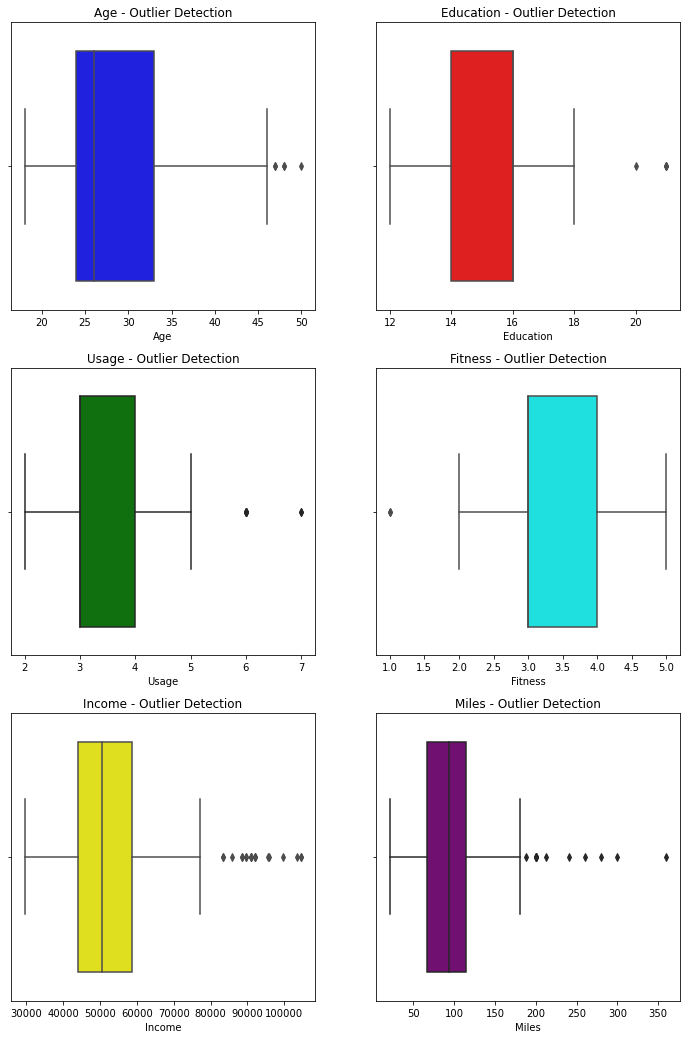

In [79]:
fig,ax = plt.subplots(nrows = 3, ncols = 2 , figsize = (12,18))

sns.boxplot(data = df, x = 'Age', ax = ax[0,0], color = 'blue');   ax[0,0].set_title('Age - Outlier Detection')

sns.boxplot(data=df, x = 'Education',ax = ax[0,1], color = 'red');   ax[0,1].set_title('Education - Outlier Detection')

sns.boxplot(data=df, x = 'Usage',ax = ax[1,0], color = 'green');   ax[1,0].set_title('Usage - Outlier Detection')

sns.boxplot(data=df, x = 'Fitness',ax = ax[1,1], color = 'cyan');   ax[1,1].set_title('Fitness - Outlier Detection')

sns.boxplot(data = df, x = 'Income', ax = ax[2,0], color = 'yellow');   ax[2,0].set_title('Income - Outlier Detection')

sns.boxplot(data=df, x = 'Miles',ax = ax[2,1], color = 'purple');   ax[2,1].set_title('Miles - Outlier Detection')

plt.show()


## Univariate Analysis

KP281 is the most purchased product.

Most of the customers are Male.

Most customers earning between 30k and 60k.

Most customers uses treadmill 3 times a week and running 50km to 120km miles per week


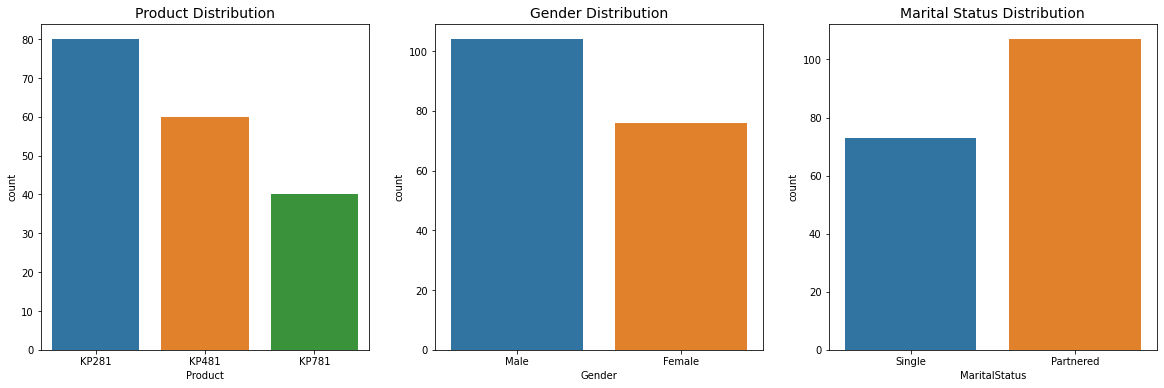

In [80]:
fig,ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,6))

sns.countplot(data = df, x = 'Product', ax = ax[0]);  ax[0].set_title('Product Distribution', fontsize = 14)

sns.countplot(data = df, x = 'Gender', ax = ax[1]);  ax[1].set_title('Gender Distribution', fontsize = 14)

sns.countplot(data = df, x = 'MaritalStatus', ax = ax[2]);  ax[2].set_title('Marital Status Distribution', fontsize = 14)

plt.show()


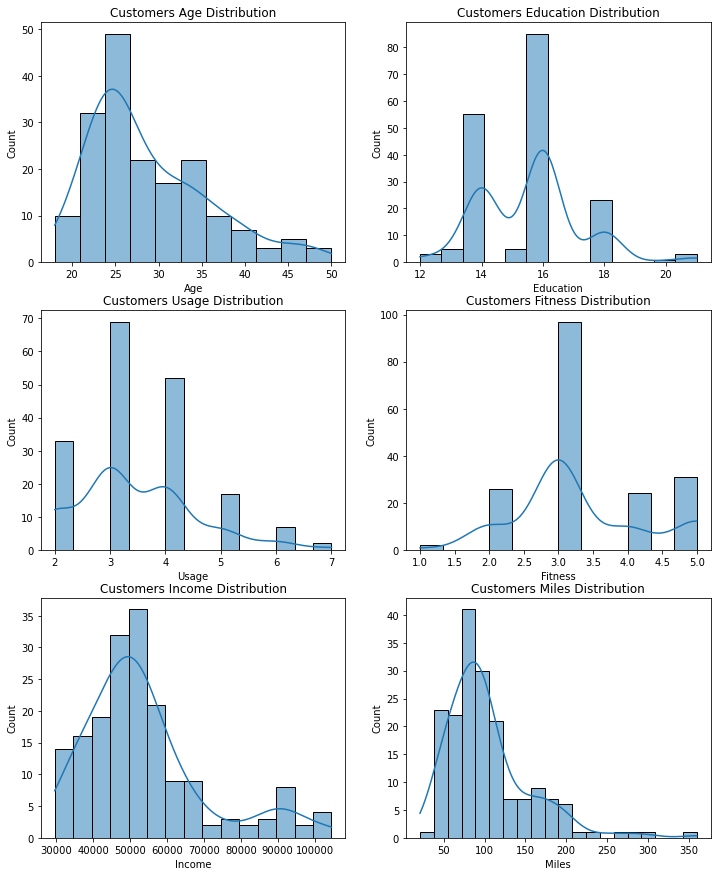

In [81]:
fig,ax = plt.subplots(nrows = 3, ncols = 2 , figsize = (12,15))

sns.histplot(data=df, x = 'Age', kde = True, ax = ax[0,0]);   ax[0,0].set_title('Customers Age Distribution')

sns.histplot(data=df, x = 'Education', kde = True, ax = ax[0,1]);   ax[0,1].set_title('Customers Education Distribution')

sns.histplot(data=df, x = 'Usage', kde = True, ax = ax[1,0]);   ax[1,0].set_title('Customers Usage Distribution')

sns.histplot(data = df, x = 'Fitness', kde = True,  ax = ax[1,1]);   ax[1,1].set_title('Customers Fitness Distribution')

sns.histplot(data = df, x = 'Income', kde = True,  ax = ax[2,0]);   ax[2,0].set_title('Customers Income Distribution')

sns.histplot(data=df, x = 'Miles', kde = True, ax = ax[2,1]);   ax[2,1].set_title('Customers Miles Distribution')

plt.show()


## Bivariate Analysis

Equal number of Male and Female customers have purchased KP281 and almost same for the product KP481

Most of the males have purchased KP781.

Most of the partnered customeres have purchased KP281

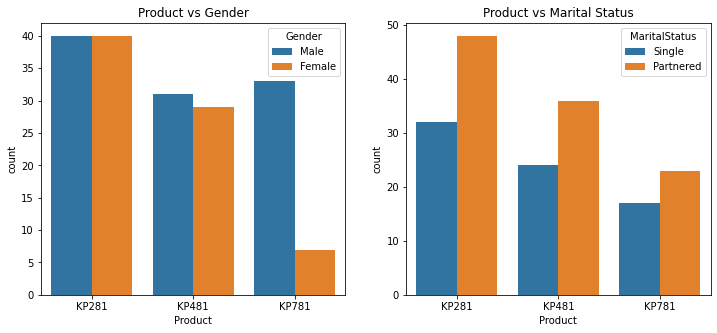

In [82]:

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

sns.countplot(data = df, x = 'Product', hue = 'Gender' , ax= ax[0]); ax[0].set_title('Product vs Gender')

sns.countplot(data = df, x = 'Product', hue = 'MaritalStatus', ax= ax[1]); ax[1].set_title('Product vs Marital Status')
plt.show()



Customers purchasing KP281 and KP481 have same meadian age while KP781 has the highest median age.

Customers between 14 to 16 years of education prefer KP281 or KP481 while KP781 is prefered by 16+ years of education

Customers who uses treadmill more than 4 times a week prefer KP781 treadmill.

The customers whose fitness is more than 4 (self-rating) have the higher chance of purchasing KP781.

Higher the income of the customer,i.e. more than 60k, higher the chances of purchasing KP781.

Customer is more likely to purchase KP781 if he/she runs more than 130 miles.


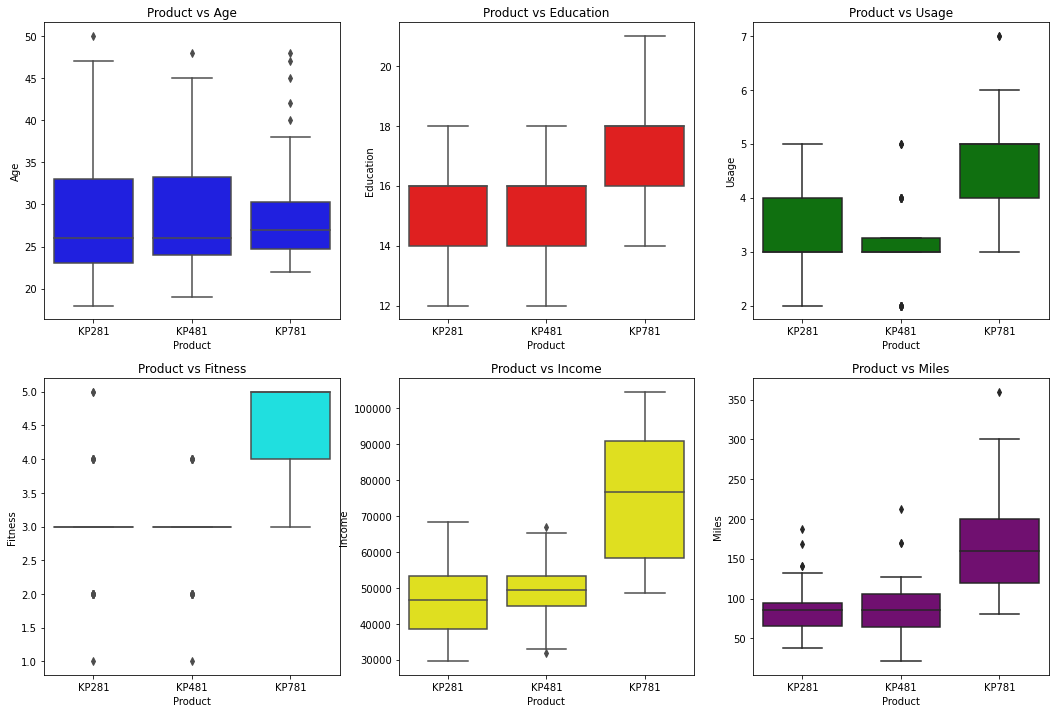

In [83]:

fig,ax = plt.subplots(nrows = 2, ncols = 3 , figsize = (18,12))

sns.boxplot(data = df, x = 'Product', y = 'Age', ax = ax[0,0], color = 'blue');   ax[0,0].set_title('Product vs Age')

sns.boxplot(data=df, x = 'Product', y = 'Education',ax = ax[0,1], color = 'red');   ax[0,1].set_title('Product vs Education')

sns.boxplot(data=df, x = 'Product', y = 'Usage',ax = ax[0,2], color = 'green');   ax[0,2].set_title('Product vs Usage')

sns.boxplot(data=df, x = 'Product', y = 'Fitness',ax = ax[1,0], color = 'cyan');   ax[1,0].set_title('Product vs Fitness')

sns.boxplot(data = df, x = 'Product', y = 'Income', ax = ax[1,1], color = 'yellow');   ax[1,1].set_title('Product vs Income')

sns.boxplot(data=df, x = 'Product', y = 'Miles',ax = ax[1,2], color = 'purple');   ax[1,2].set_title('Product vs Miles')

plt.show()


Text(0.5, 1.0, 'Age Distribution for Product KP781')

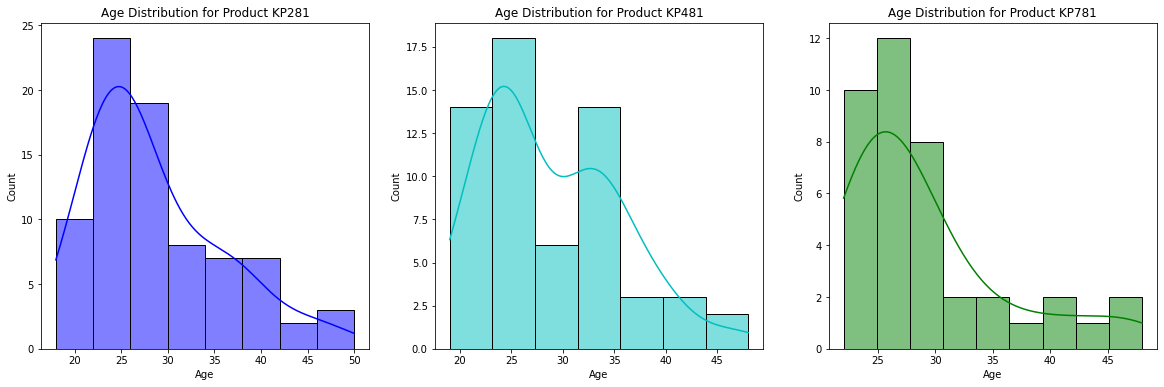

In [84]:
fig,ax = plt.subplots(nrows = 1, ncols = 3 , figsize = (20,6))

sns.histplot(x = df[df['Product'] == 'KP281']['Age'], kde =True, ax=ax[0],color='b');  ax[0].set_title('Age Distribution for Product KP281')

sns.histplot(x = df[df['Product'] == 'KP481']['Age'], kde =True, ax=ax[1],color='c');  ax[1].set_title('Age Distribution for Product KP481')

sns.histplot(x = df[df['Product'] == 'KP781']['Age'], kde =True, ax=ax[2],color='g');  ax[2].set_title('Age Distribution for Product KP781')


## Visual Analysis - Correlation

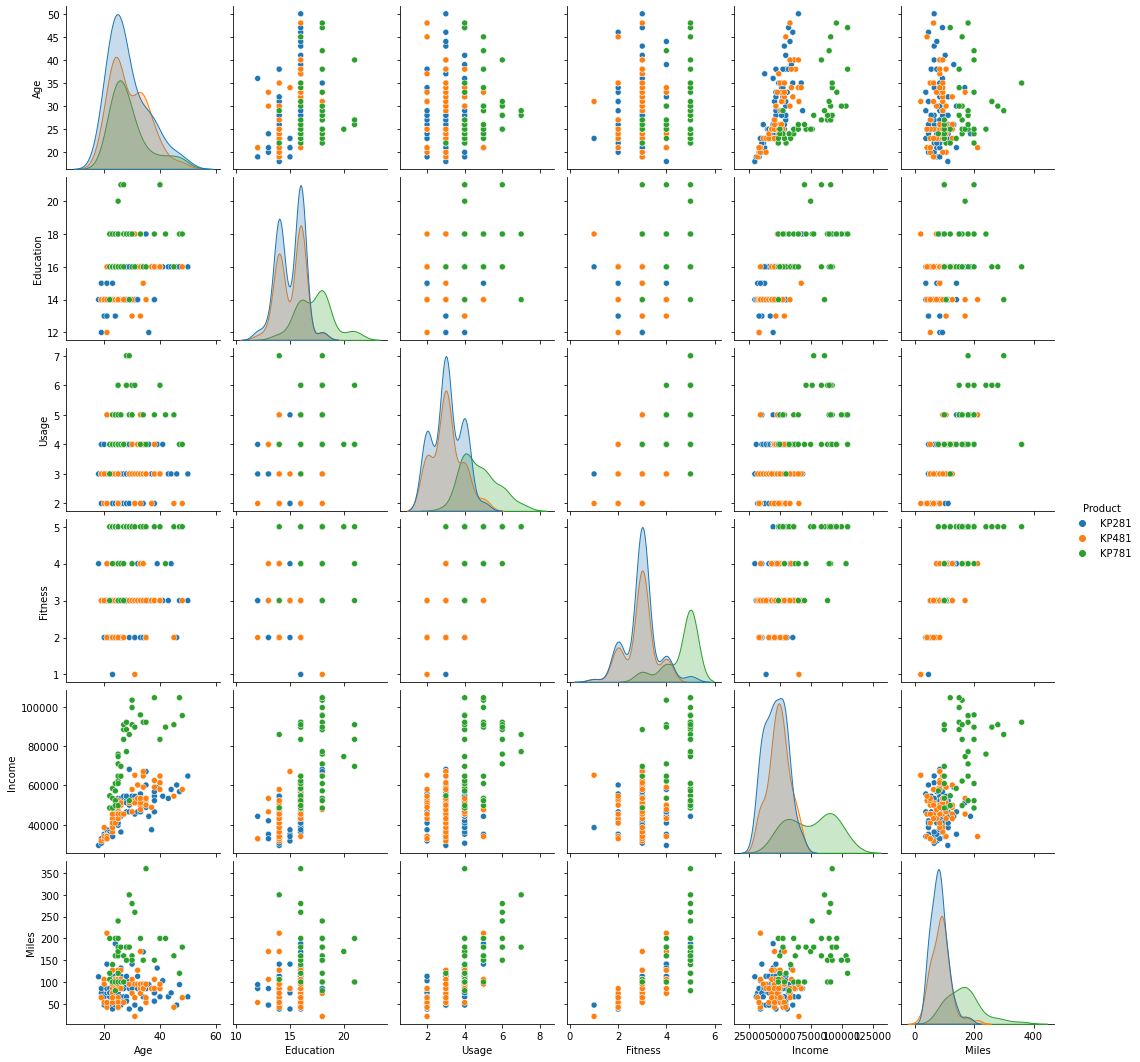

In [85]:

sns.pairplot(data = df,hue='Product')
plt.show()


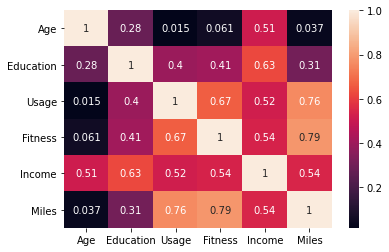

In [86]:

sns.heatmap(df.corr(),annot = True)
plt.show()


### Customer's Profile for Product KP281


1. Most popular product among other products.

2. Mostly used by customers of age less than 30.

3. Customers having education less than 16 years.

4. Majority customers uses 3 times a week.

5. Fitness rating below 3.

6. Customers running less than 120 miles a week.

7. Males and Females both prefer equally this product but partnered customers prefer more than single customers.


### Customer's Profile for Product KP481


1. 2nd most purchased product among other products.

2. Mostly used by customers of age between 20 and 35.

3. Customers having education less than 16 years.

4. Majority customers uses 3 times a week, followed by 4 times a week and 2 times a week.

5. Fitness rating below 3.

6. Customers running less than 125 miles a week.

7. Males partnered customers purchase this product more than the single male customers.


### Customer's Profile for Product KP781


1. Mostly prefered by male customers.

2. Mostly used by customers of age less than 30.

3. Customers having education less than 19 years.

4. Majority customers uses more than 4 times a week.

5. Ftiness rating above 4.

6. Having high income.

7. Customers running more than 100 miles a week.



# Business Insights : 

1.  57.78% Customers are Male.


2. 59.44% Customers are Partnered.


3. KP281 is the most sold product with 44.44% of sales.


4. Male partnered customers prefer KP281, female partnered customers prefer KP481 and male customers mostly prefered KP781.


5. 75% of customers are below 33 years of age.


6.  75% of customers have income less than 60k and customers having income more than 60k prefer KP781.


7. Probability of purchasing KP281 is 44.44% but if customer is female and partnered then probability increases to 58.70%.


8. Probability of purchasing KP481 is 33.33% but if customer is female and single then probability increases to 46.67%.


9. Probability of purchasing KP781 is 22.22% but if customer is Male and single then probability increases to 32.56%.


10. Probability of purchasing KP281 is 22.22% but if customer is female and partnered then probability decreases to 8.70%.


## Recommendation

1. KP781 can be used to recommend customers who are male, have more usage and have high salaries. Similarly, any premium product can be recommended to customers with same characteristics.


2. KP281 can be recommended to customers who are feamle and partnered, below age 30 years. KP481 has same characteristics for customers. KP281 is sold most if KP481 can be recommended more than its sale can also increase.


3. The sale of product can increase if personalized ads in e-commerce and social media are recommended to customers who belong under these characteristics.


4. Awareness related to heath and fitness can also be recommended through ads.
